# Data Cleaning and Processing

In [186]:
import pandas as pd 
df = pd.read_csv("./data2024/survey_results_public.csv")

In [ ]:
#use median to fill missing values

df['WorkExp'].fillna(df['WorkExp'].median(), inplace=True)
df = df.dropna(subset=['ConvertedCompYearly'])
df['ConvertedCompYearly']

/var/folders/d9/sm63sd5x60ld_kb4fb2pm3zc0000gn/T/ipykernel_41890/771941727.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WorkExp'].fillna(df['WorkExp'].median(), inplace=True)


72         7322.0
374       30074.0
379       91295.0
385       53703.0
389      110000.0
           ...   
41180     44640.0
41184    170000.0
41185    116844.0
41186     12000.0
41187    222834.0
Name: ConvertedCompYearly, Length: 23435, dtype: float64

In [189]:
#calculate petcentage of missing value in each columns

missing_values = (df.isna().sum()/len(df))*100
missing_values[missing_values > 50]

EmbeddedHaveWorkedWith           65.470450
EmbeddedWantToWorkWith           72.178366
EmbeddedAdmired                  73.364626
AIToolNot interested in Using    56.906337
AINextMuch more integrated       76.479624
AINextNo change                  77.909110
AINextMore integrated            56.099851
AINextLess integrated            96.603371
AINextMuch less integrated       98.374227
dtype: float64

In [ ]:
# drop all columns that has more than 50 percent of missing value

df_cleaned = df.drop(columns=missing_values[missing_values > 50].index)
df_cleaned

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,65.0,100.0,100.0,100.0,50.0,90.0,Too long,Easy,7322.0,10.0
374,375,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Written-based...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,30074.0,NaN
379,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.0,0.0,0.0,0.0,0.0,0.0,Too long,Difficult,91295.0,10.0
385,386,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,53703.0,NaN
389,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,20.0,30.0,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,41181,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Written Tutorials;Stac...,...,0.0,0.0,0.0,0.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,44640.0,NaN
41184,41185,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Freel...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books,...,20.0,10.0,20.0,15.0,0.0,0.0,Appropriate in length,Easy,170000.0,9.0
41185,41186,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Other (please specify):,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,116844.0,NaN
41186,41187,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,Some college/university study without earning ...,Books / Physical media;On the job training;Oth...,Technical documentation;Books;Written Tutorial...,...,20.0,25.0,15.0,5.0,5.0,0.0,Appropriate in length,Easy,12000.0,3.0


In [191]:
# drop column 'check'

df_cleaned = df_cleaned.drop(columns='Check')

# Problem One: Popular Languages

In [192]:
languages = df_cleaned['LanguageWantToWorkWith']
languages

72                                           C#;Rust;Scala
374                                C;C++;MATLAB;Python;SQL
379               Go;JavaScript;Python;Rust;SQL;TypeScript
385                                      Python;Rust;Scala
389                                          Go;Rust;Swift
                               ...                        
41180                                           C++;Python
41184    Bash/Shell (all shells);C;HTML/CSS;Java;JavaSc...
41185                                        C#;PowerShell
41186    C;C++;Go;HTML/CSS;Java;JavaScript;Kotlin;Pytho...
41187    Assembly;C;C++;Erlang;Go;Objective-C;PHP;SQL;S...
Name: LanguageWantToWorkWith, Length: 23435, dtype: object

In [ ]:
# devide each data by ";"
df_cleaned['LanguageWantToWorkWith'] = df_cleaned['LanguageWantToWorkWith'].str.split(";")

# use "explode" to make each language a row
df_languages = df_cleaned.explode('LanguageWantToWorkWith')

# check
print(df_languages[['ResponseId', 'LanguageWantToWorkWith']].head(10))



     ResponseId LanguageWantToWorkWith
72           73                     C#
72           73                   Rust
72           73                  Scala
374         375                      C
374         375                    C++
374         375                 MATLAB
374         375                 Python
374         375                    SQL
379         380                     Go
379         380             JavaScript


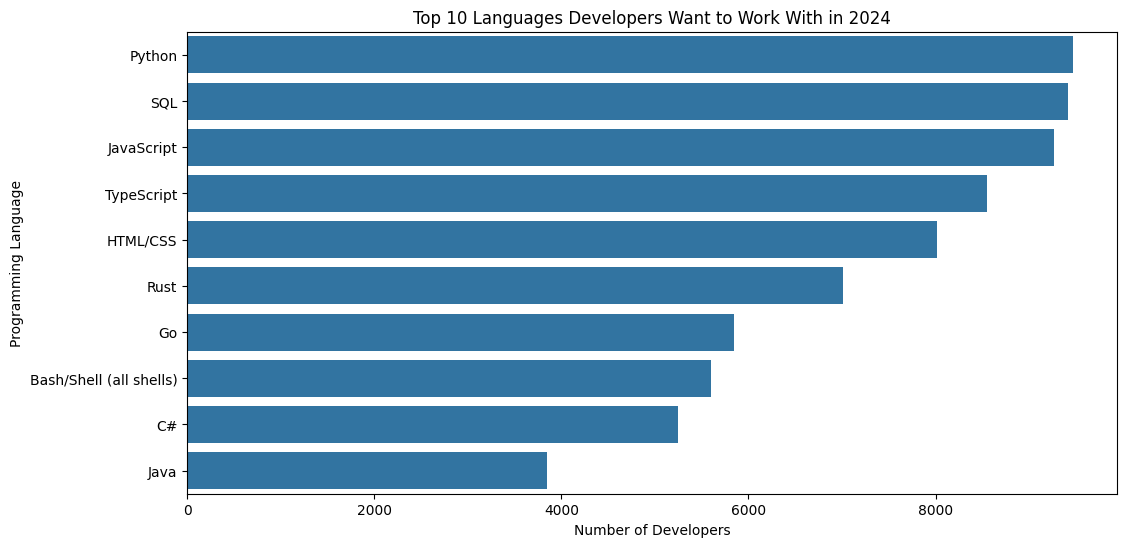

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# calculate amount of each value
language_counts = df_languages['LanguageWantToWorkWith'].value_counts()

# make a bar chart with top ten languages
plt.figure(figsize=(12, 6))
sns.barplot(x=language_counts.head(10).values, y=language_counts.head(10).index)
plt.xlabel("Number of Developers")
plt.ylabel("Programming Language")
plt.title("Top 10 Languages Developers Want to Work With in 2024")
plt.show()


In [195]:
print(language_counts)

LanguageWantToWorkWith
Python                     9465
SQL                        9413
JavaScript                 9262
TypeScript                 8547
HTML/CSS                   8018
Rust                       7011
Go                         5840
Bash/Shell (all shells)    5604
C#                         5243
Java                       3849
C++                        3363
Kotlin                     2840
C                          2429
PHP                        2090
PowerShell                 1744
Swift                      1428
Zig                        1356
Dart                       1314
Elixir                     1277
Lua                        1118
Ruby                       1100
Scala                       762
Assembly                    743
Haskell                     743
R                           727
Clojure                     595
F#                          558
GDScript                    537
Erlang                      459
Lisp                        446
OCaml            

## 1-2 Language preferences between various countries

In [196]:
df_languages.groupby(['Country', 'LanguageWantToWorkWith']).size().unstack().fillna(0)

LanguageWantToWorkWith,Ada,Apex,Assembly,Bash/Shell (all shells),C,C#,C++,Clojure,Cobol,Crystal,...,Rust,SQL,Scala,Solidity,Swift,TypeScript,VBA,Visual Basic (.Net),Zephyr,Zig
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.0,0.0,0.0,2.0,1.0,1.0,2.0,0.0,0.0,1.0,...,3.0,6.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0
Albania,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,...,2.0,4.0,1.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0
Algeria,0.0,0.0,1.0,1.0,3.0,3.0,2.0,0.0,0.0,0.0,...,1.0,4.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Venezuela, Bolivarian Republic of...",0.0,0.0,0.0,5.0,1.0,7.0,3.0,1.0,0.0,0.0,...,6.0,17.0,2.0,0.0,1.0,13.0,3.0,4.0,0.0,2.0
Viet Nam,1.0,1.0,4.0,8.0,7.0,11.0,6.0,1.0,1.0,1.0,...,23.0,24.0,4.0,2.0,4.0,26.0,1.0,1.0,1.0,4.0
Yemen,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0


### Heatmap for languages in different countries

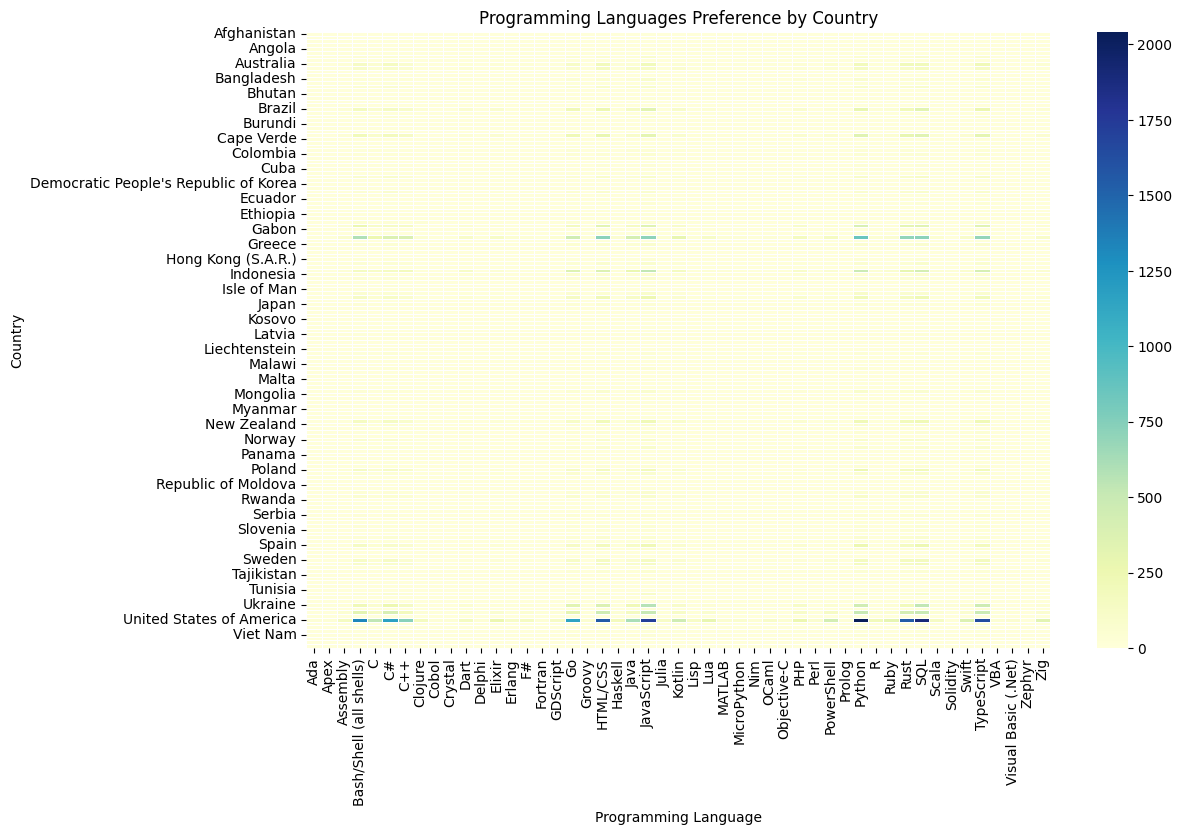

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt

lang_by_country = df_languages.groupby(['Country', 'LanguageWantToWorkWith']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(lang_by_country, cmap="YlGnBu", linewidths=0.5)
plt.title("Programming Languages Preference by Country")
plt.xlabel("Programming Language")
plt.ylabel("Country")
plt.show()


### Barchart

/var/folders/d9/sm63sd5x60ld_kb4fb2pm3zc0000gn/T/ipykernel_41890/4112897931.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Count', y='LanguageWantToWorkWith', hue='Country', data=lang_by_country, ci=None)


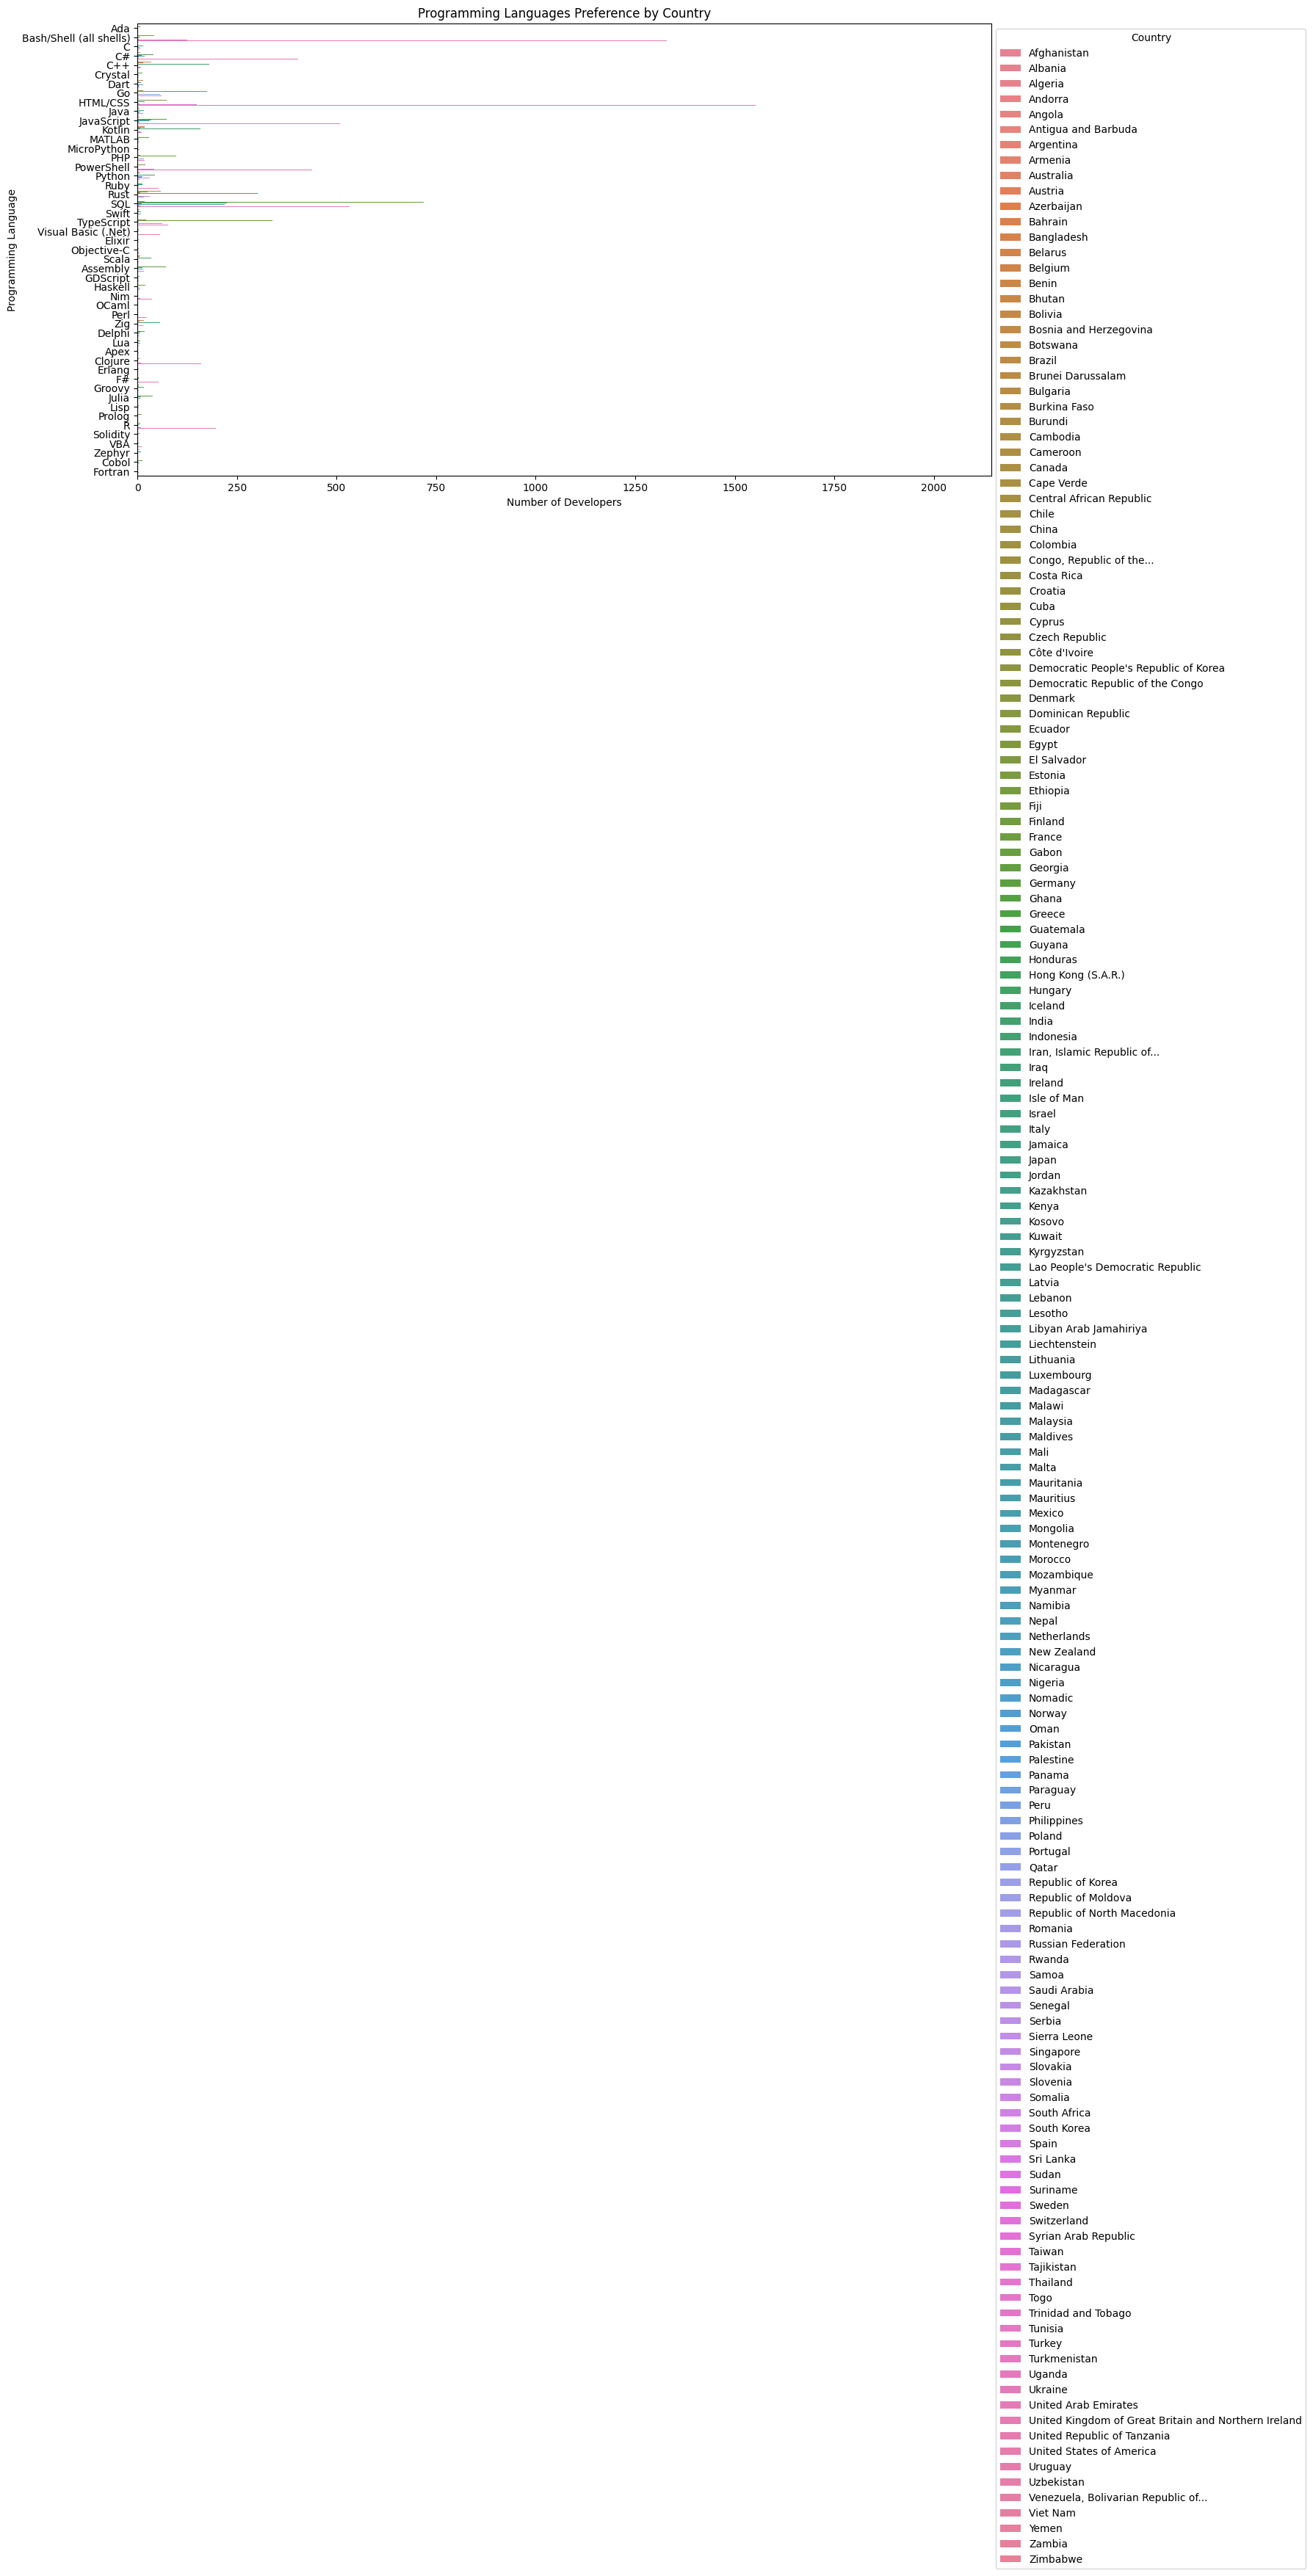

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate: Count the number of times each language appears in each country
lang_by_country = df_languages.groupby(['Country', 'LanguageWantToWorkWith']).size().reset_index(name='Count')

# Plot the bar chart correctly
plt.figure(figsize=(15, 8))
sns.barplot(x='Count', y='LanguageWantToWorkWith', hue='Country', data=lang_by_country, ci=None)
plt.title("Programming Languages Preference by Country")
plt.xlabel("Number of Developers")
plt.ylabel("Programming Language")
plt.legend(title="Country", bbox_to_anchor=(1, 1))
plt.show()


### Language preference for specific country (e.g. United States of America)

/var/folders/d9/sm63sd5x60ld_kb4fb2pm3zc0000gn/T/ipykernel_41890/5089554.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Count', y='LanguageWantToWorkWith', data=lang_by_usa.head(10), ci=None)


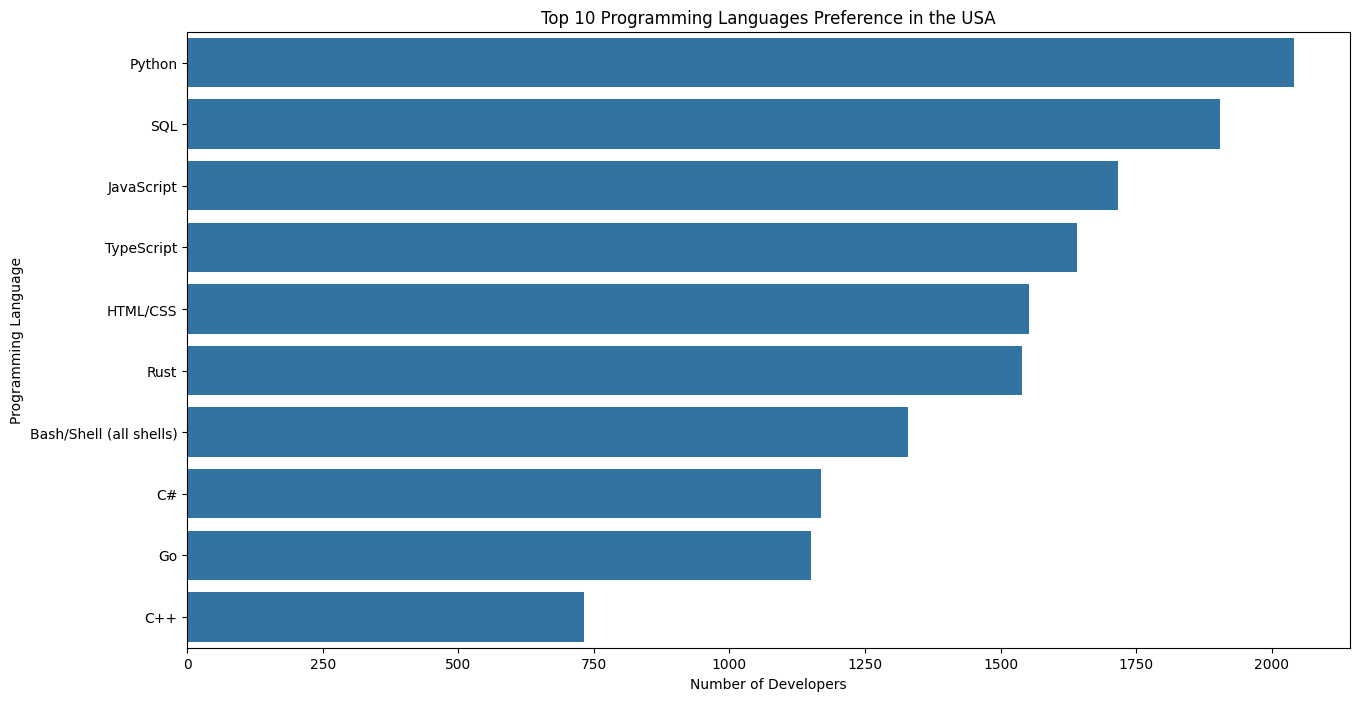

In [226]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data to only include "United States of America"
df_usa = df_languages[df_languages['Country'] == 'United States of America']

# Count how many developers chose each language in the USA
lang_by_usa = df_usa.groupby(['LanguageWantToWorkWith']).size().reset_index(name='Count')

# Sort by most popular languages
lang_by_usa = lang_by_usa.sort_values(by="Count", ascending=False)

# Plot the bar chart
plt.figure(figsize=(15, 8))
sns.barplot(x='Count', y='LanguageWantToWorkWith', data=lang_by_usa.head(10), ci=None)

# Formatting the chart
plt.title("Top 10 Programming Languages Preference in the USA")
plt.xlabel("Number of Developers")
plt.ylabel("Programming Language")
plt.show()


## 1-3 Language preferences based on differnt Employment status

In [ ]:
df_languages.groupby(['Employment','LanguageWantToWorkWith']).size().unstack().fillna(0)

LanguageWantToWorkWith,Ada,Apex,Assembly,Bash/Shell (all shells),C,C#,C++,Clojure,Cobol,Crystal,...,Rust,SQL,Scala,Solidity,Swift,TypeScript,VBA,Visual Basic (.Net),Zephyr,Zig
Employment,,,,,,,,,,,,,,,,,,,,,
"Employed, full-time",83.0,79.0,461.0,4087.0,1647.0,3973.0,2408.0,459.0,73.0,84.0,...,5190.0,6844.0,553.0,173.0,981.0,6264.0,139.0,176.0,55.0,938.0
"Employed, full-time;Employed, part-time",1.0,1.0,3.0,17.0,3.0,23.0,13.0,4.0,1.0,0.0,...,29.0,37.0,4.0,3.0,4.0,40.0,0.0,0.0,0.0,8.0
"Employed, full-time;Independent contractor, freelancer, or self-employed",8.0,17.0,68.0,444.0,159.0,413.0,214.0,44.0,9.0,17.0,...,474.0,824.0,56.0,38.0,161.0,733.0,14.0,17.0,4.0,106.0
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time",2.0,2.0,4.0,14.0,4.0,12.0,10.0,1.0,3.0,1.0,...,19.0,30.0,2.0,6.0,11.0,32.0,1.0,0.0,1.0,4.0
"Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time",1.0,1.0,3.0,18.0,9.0,22.0,16.0,3.0,3.0,1.0,...,27.0,34.0,2.0,2.0,9.0,42.0,1.0,0.0,1.0,11.0
"Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time",0.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,3.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0
"Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Retired",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Employed, full-time;Not employed, and not looking for work",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Employed, full-time;Not employed, but looking for work",0.0,0.0,1.0,7.0,1.0,4.0,4.0,1.0,0.0,0.0,...,6.0,9.0,0.0,0.0,0.0,9.0,0.0,1.0,0.0,2.0


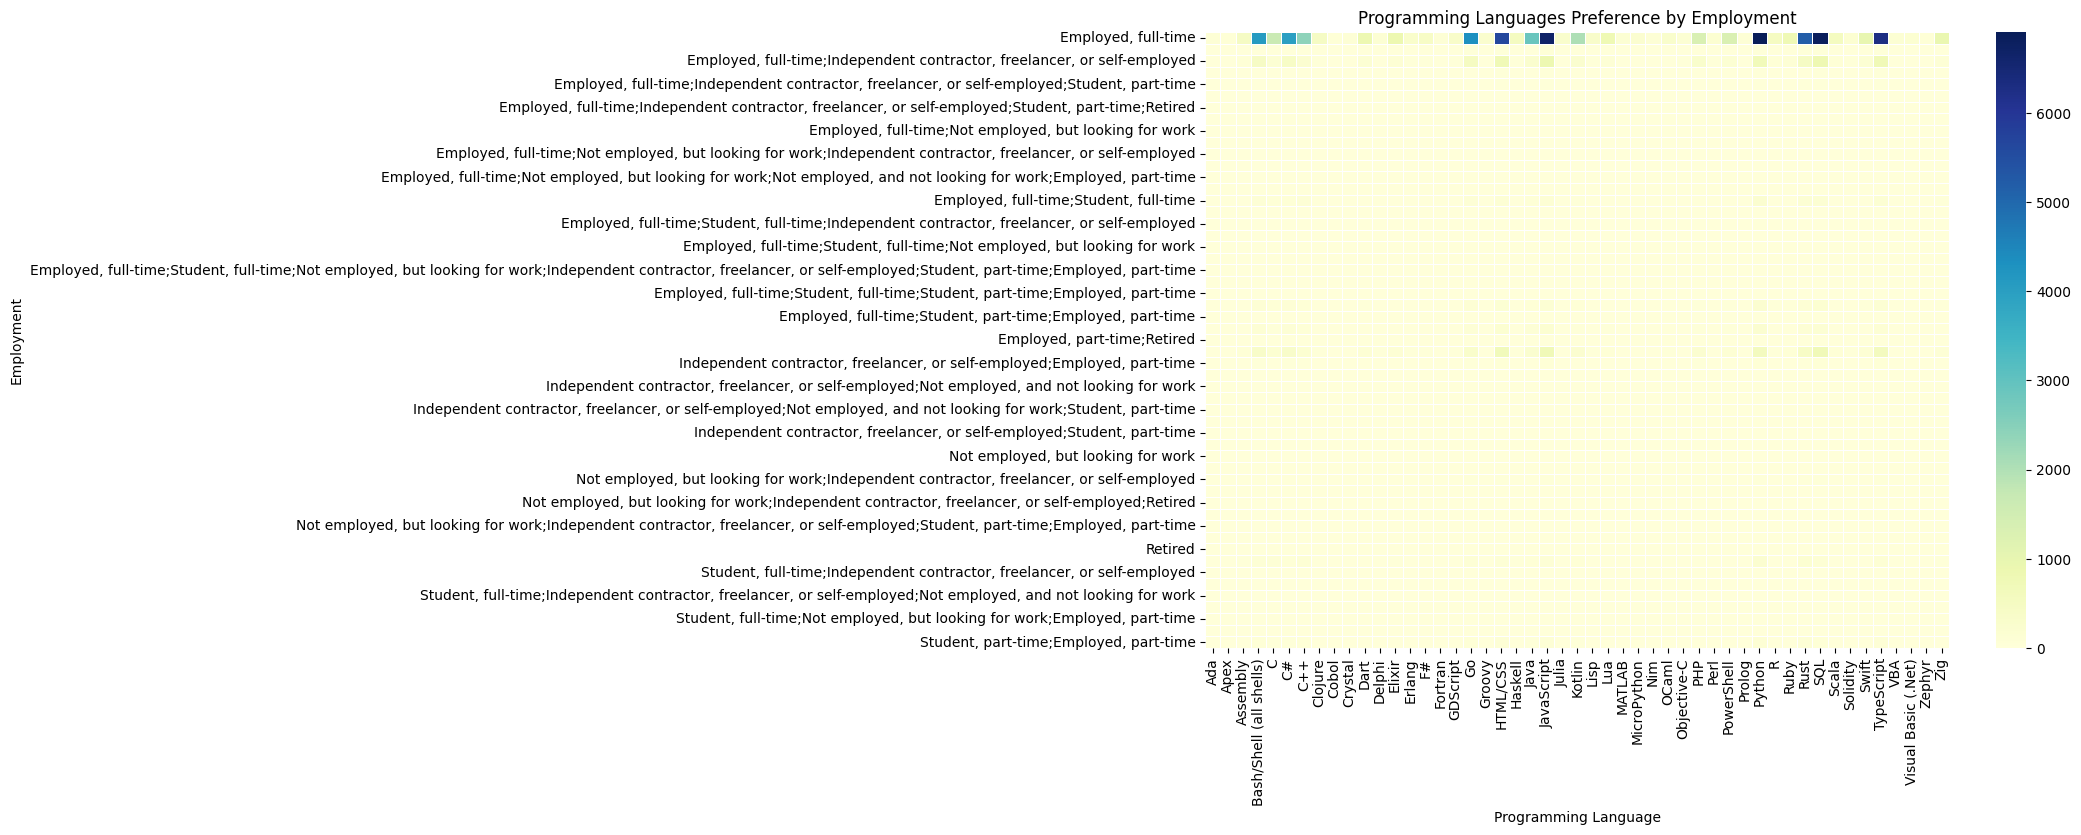

In [239]:
import seaborn as sns
import matplotlib.pyplot as plt

lang_by_emp = df_languages.groupby(['Employment', 'LanguageWantToWorkWith']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(lang_by_emp, cmap="YlGnBu", linewidths=0.5)
plt.title("Programming Languages Preference by Employment")
plt.xlabel("Programming Language")
plt.ylabel("Employment")
plt.show()

/var/folders/d9/sm63sd5x60ld_kb4fb2pm3zc0000gn/T/ipykernel_41890/817414373.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Count', y='LanguageWantToWorkWith', hue='Employment', data=filtered_data, ci=None)


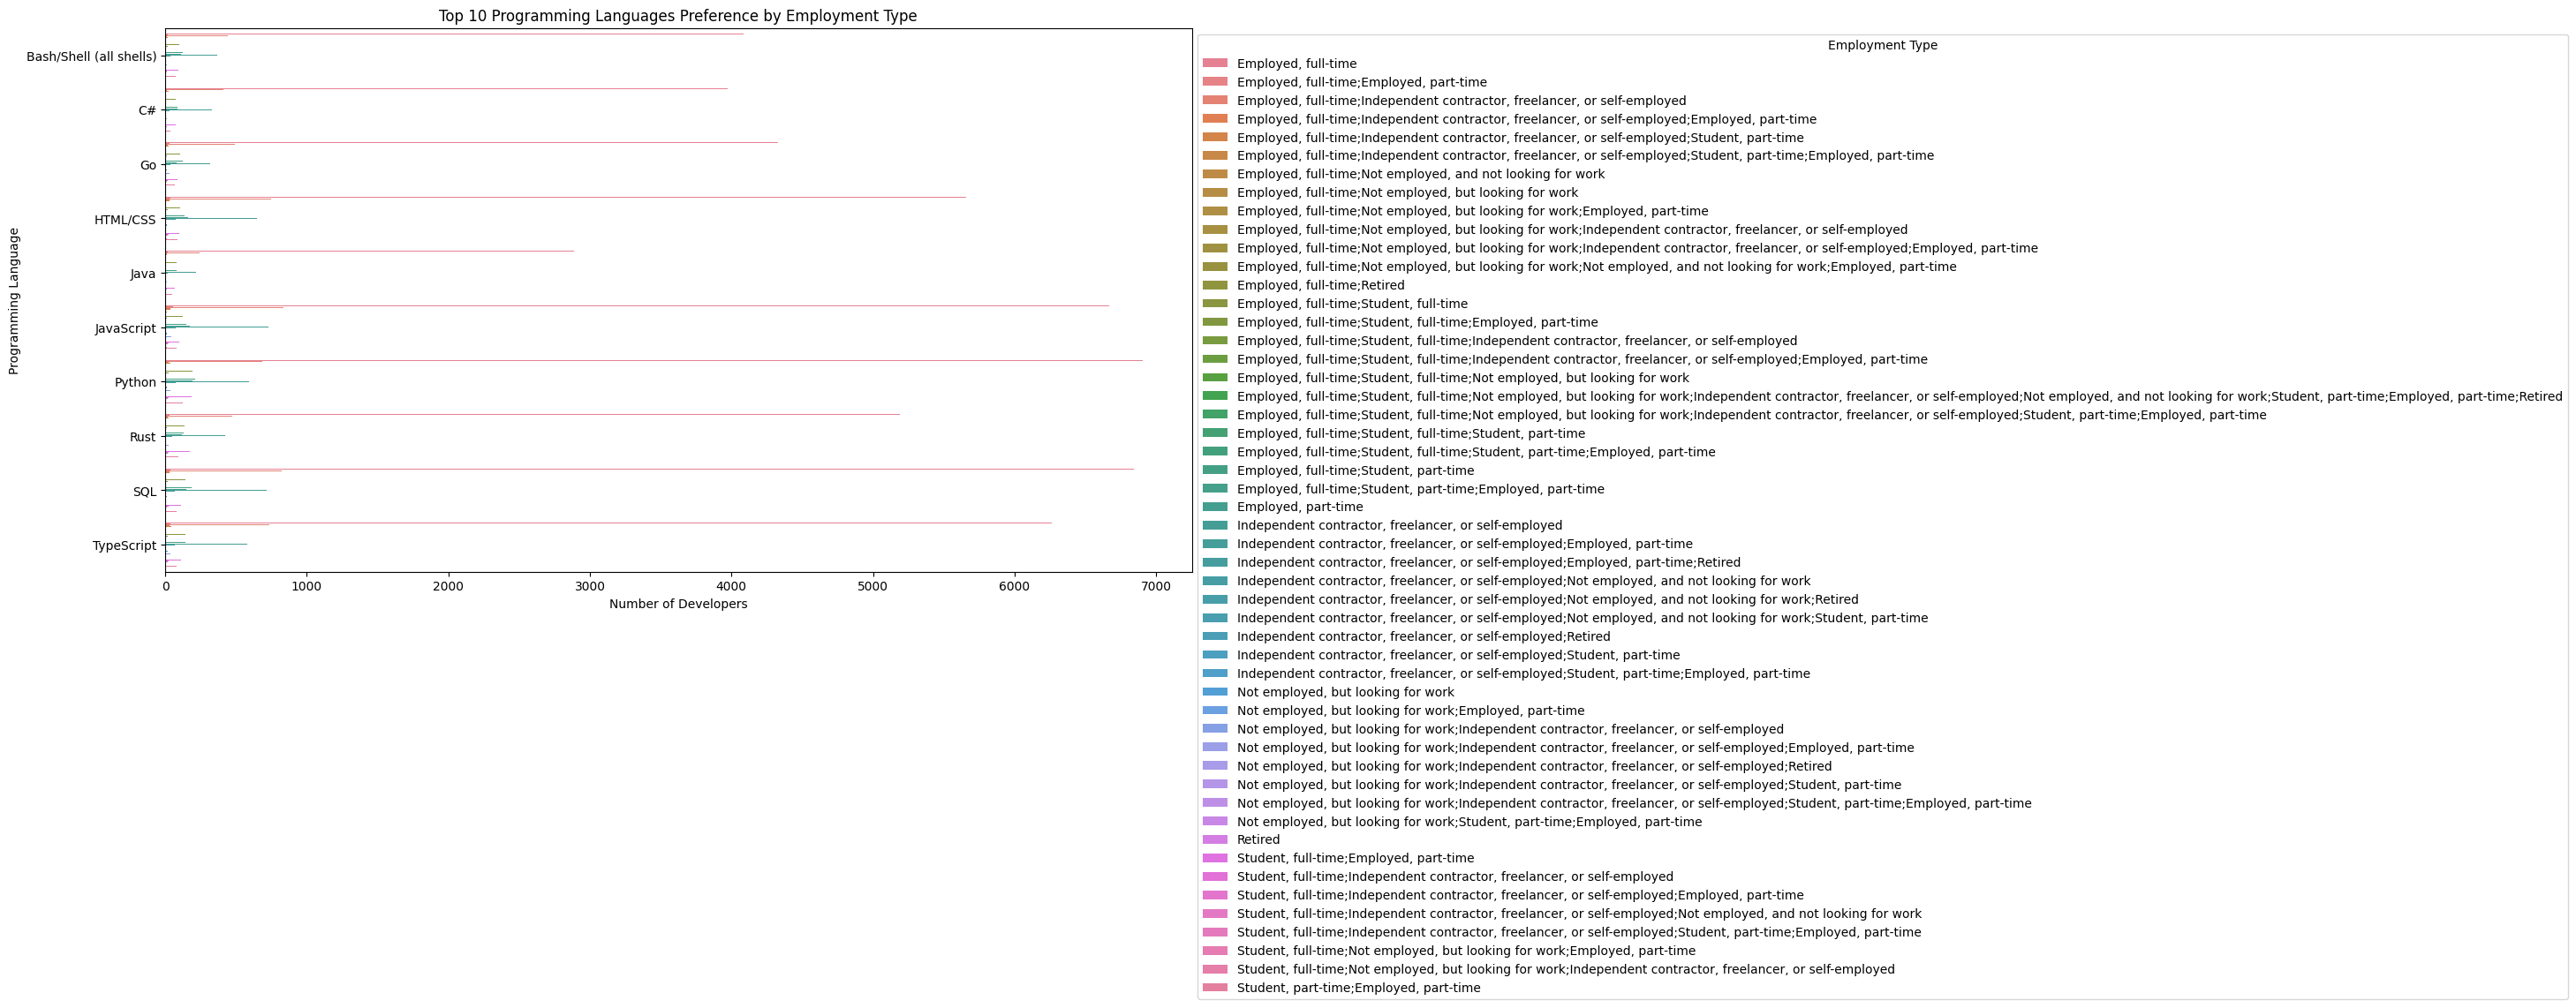

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate: Count the number of developers who want to work with each language by employment type
lang_by_emp = df_languages.groupby(['Employment', 'LanguageWantToWorkWith']).size().reset_index(name='Count')

# Plot the bar chart
plt.figure(figsize=(15, 8))
sns.barplot(x='Count', y='LanguageWantToWorkWith', hue='Employment', data=lang_by_emp, ci=None)

# Formatting the chart
plt.title("Programming Languages Preference by Employment Type")
plt.xlabel("Number of Developers")
plt.ylabel("Programming Language")
plt.legend(title="Employment Type", bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define ordered categories for YearsCodePro
experience_order = [
    "Less than 1 year", "1-2 years", "3-5 years", "6-8 years",
    "9-11 years", "12-14 years", "15-17 years", "18-20 years",
    "21-25 years", "26-30 years", "31-35 years", "36-40 years",
    "41-50 years", "More than 50 years"
]

# Ensure YearsCodePro is categorical and sorted
df_languages['YearsCodePro'] = pd.Categorical(df_languages['YearsCodePro'], categories=experience_order, ordered=True)

# Group by experience and programming language, count occurrences
lang_by_experience = df_languages.groupby(['YearsCodePro', 'LanguageWantToWorkWith']).size().unstack().fillna(0)

# Sort rows by experience level
lang_by_experience = lang_by_experience.loc[experience_order]

# check by first few rows
lang_by_experience.head(20)



/var/folders/d9/sm63sd5x60ld_kb4fb2pm3zc0000gn/T/ipykernel_41890/3460328556.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lang_by_experience = df_languages.groupby(['YearsCodePro', 'LanguageWantToWorkWith']).size().unstack().fillna(0)


LanguageWantToWorkWith,Ada,Apex,Assembly,Bash/Shell (all shells),C,C#,C++,Clojure,Cobol,Crystal,...,Rust,SQL,Scala,Solidity,Swift,TypeScript,VBA,Visual Basic (.Net),Zephyr,Zig
YearsCodePro,,,,,,,,,,,,,,,,,,,,,
Less than 1 year,13,5,36,155,111,137,145,12,12,6,...,204,239,24,10,41,249,12,14,4,62
1-2 years,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3-5 years,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6-8 years,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9-11 years,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12-14 years,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15-17 years,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18-20 years,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21-25 years,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


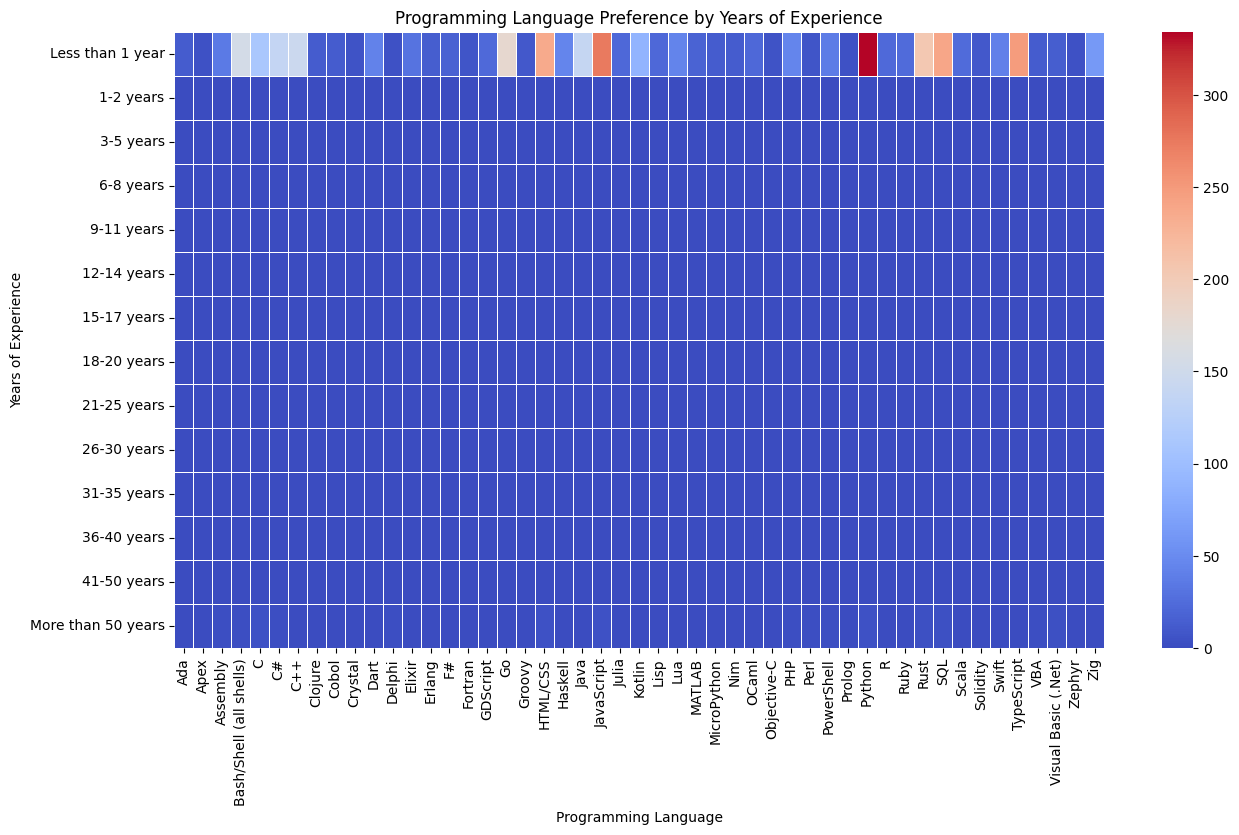

In [219]:
plt.figure(figsize=(15, 8))
sns.heatmap(lang_by_experience, cmap="coolwarm", linewidths=0.5, annot=False)
plt.title("Programming Language Preference by Years of Experience")
plt.xlabel("Programming Language")
plt.ylabel("Years of Experience")
plt.xticks(rotation=90)
plt.show()

# Problem Two: The relationship between education level and Compensate

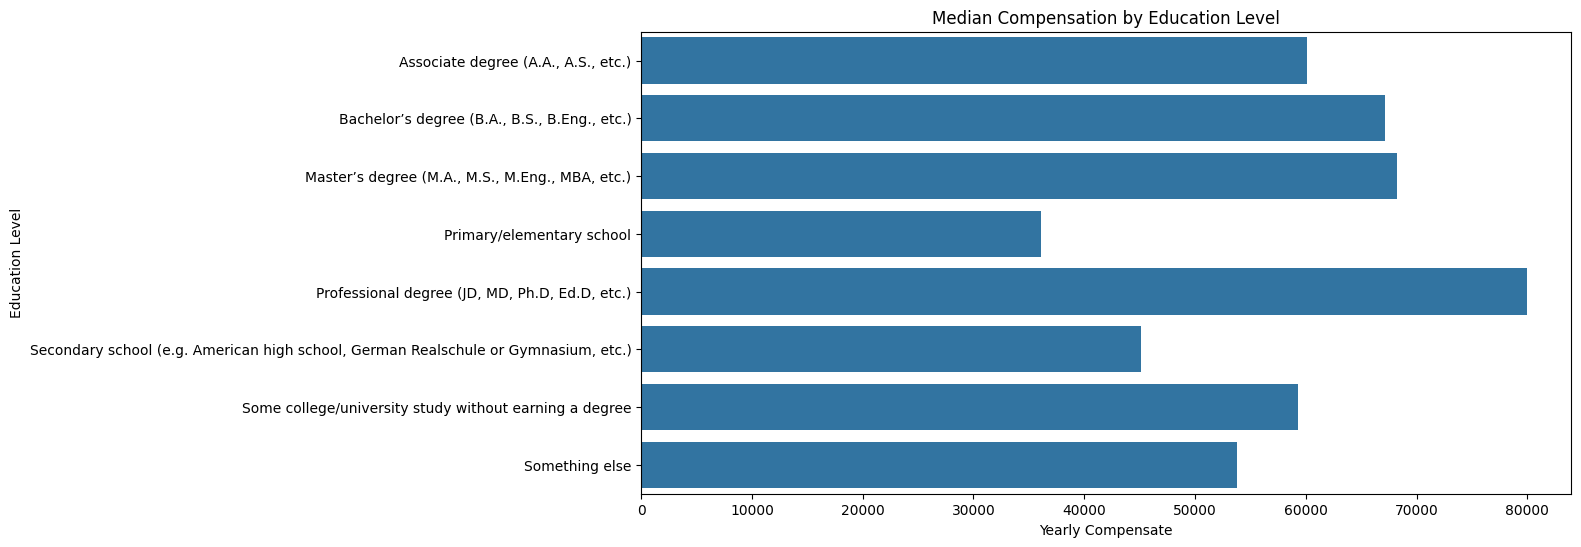

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt

salary_by_education = df_cleaned.groupby('EdLevel')['ConvertedCompYearly'].median().reset_index()
salary_by_education.sort_values(by='EdLevel')
plt.figure(figsize=(12,6))
sns.barplot(x='ConvertedCompYearly', y='EdLevel', data=salary_by_education)
plt.title('Median Compensation by Education Level')
plt.xlabel('Yearly Compensate')
plt.ylabel('Education Level')
plt.show()

# Problem three: Work status

In [244]:
RemoteWorkCalculation = df_cleaned.groupby('RemoteWork').size().reset_index(name='Count')
RemoteWorkCalculation

,RemoteWork,Count
0,"Hybrid (some remote, some in-person)",9899
1,In-person,3937
2,Remote,9591


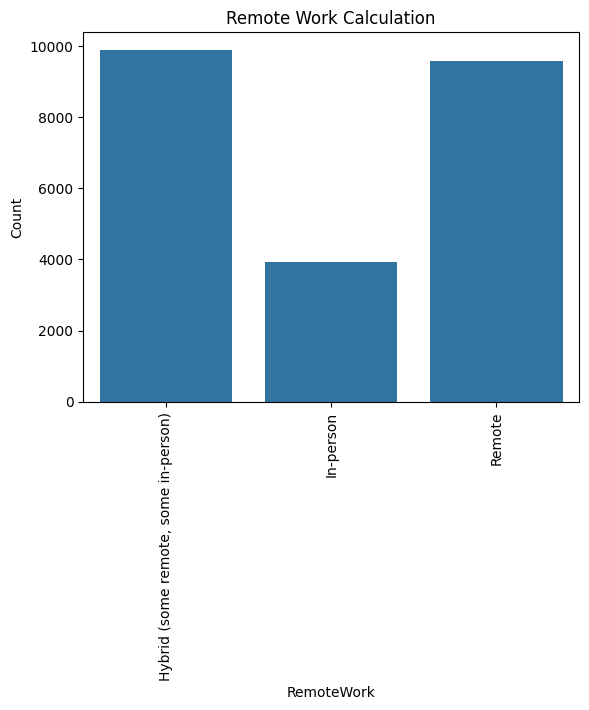

In [251]:
plt.Figure(figsize=(12,8))
sns.barplot(x='RemoteWork',y='Count',data=RemoteWorkCalculation)

plt.title('Remote Work Calculation')
plt.xlabel('RemoteWork')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [259]:
RemoteAndSalary = df_cleaned.groupby('RemoteWork')['ConvertedCompYearly'].median().reset_index()
RemoteAndSalary 

,RemoteWork,ConvertedCompYearly
0,"Hybrid (some remote, some in-person)",66592.0
1,In-person,44586.0
2,Remote,75000.0
